In [21]:
import torch
torch.manual_seed(2)
a = torch.rand(3,3)

In [22]:
a

tensor([[0.6147, 0.3810, 0.6371],
        [0.4745, 0.7136, 0.6190],
        [0.4425, 0.0958, 0.6142]])

In [23]:
# adjacent matrix
a[a>0.5] = 1
a[a<0.5] = 0
a

tensor([[1., 0., 1.],
        [0., 1., 1.],
        [0., 0., 1.]])

In [24]:
a.sum(dim=-1)

tensor([2., 2., 1.])

In [25]:
# degree matrix
def Degree_matrix(a):
    return torch.diag(a.sum(dim=1))
d = Degree_matrix(a)
d

tensor([[2., 0., 0.],
        [0., 2., 0.],
        [0., 0., 1.]])

In [26]:
# laplacian matrix
# L = Degree matrix - Adjacent matrix
def laplacian(a):
    return Degree_matrix(a)-a
l = laplacian(a)
l

tensor([[ 1.,  0., -1.],
        [ 0.,  1., -1.],
        [ 0.,  0.,  0.]])

In [27]:
#
def calc_degree_matrix_norm(a):
    return torch.diag(torch.pow(a.sum(dim=-1),-0.5))

In [28]:
calc_degree_matrix_norm(a)

tensor([[0.7071, 0.0000, 0.0000],
        [0.0000, 0.7071, 0.0000],
        [0.0000, 0.0000, 1.0000]])

In [39]:
# L_norm = I - (D^-0.5 * A * D^-0.5)
def create_graph_lapl_norm(a):
 size = a.shape[-1]
 D_norm = calc_degree_matrix_norm(a)
 L_norm = torch.ones(size) - (D_norm @ a @ D_norm )
 return L_norm

In [40]:
create_graph_lapl_norm(a)

tensor([[0.5000, 1.0000, 0.2929],
        [1.0000, 0.5000, 0.2929],
        [1.0000, 1.0000, 0.0000]])

TypeError: '_AxesStack' object is not callable

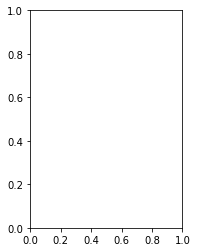

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.petersen_graph() # this is a classic graph structure named petersen
plt.subplot(121)
nx.draw(G, with_labels=False, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=False, font_weight='bold')
options = {
   'node_color': 'blue',
   'node_size': 100,
   'width': 2,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)